In [1]:
from mdlp import MDLP
import pandas as pd
from benchmark import Discretizer, Datasets
from bayesclass import TAN
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, cross_val_score, train_test_split
import numpy as np
n_folds = 5
score_name = "accuracy"
random_state=17
test_size=.3

In [2]:
def validate_classifier(model, X, y, stratified, fit_params):
    stratified_class = StratifiedKFold if stratified else KFold
    kfold = stratified_class(shuffle=True, random_state=random_state, n_splits=n_folds)
    return cross_validate(model, X, y, cv=kfold, return_estimator=True, scoring=score_name, fit_params=fit_params)

def split_data(X, y, stratified):
    if stratified:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y, shuffle=True)
    else:
        return train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)

In [3]:
def splitter(dt, name):
    X, y = dt.load(name)
    features, class_name = dt.get_features(), dt.get_class_name()
    clf = TAN()
    X_train, X_test, y_train, y_test = split_data(X, y, stratified=False)
    clf.fit(X, y, features=features, class_name=class_name, head=0)
    score = clf.score(X_test, y_test)
    clf.plot(f"{name} score={score}")
    
def crossval(dt, name):
    X, y = dt.load(name)
    features, class_name = dt.get_features(), dt.get_class_name()
    fit_params=dict(features=features, class_name=class_name, head=0)
    clf.fit(X, y, **fit_params)
    score = validate_classifier(clf, X, y, fit_params=fit_params, stratified=False)
    clf = score["estimator"][0]
    clf.plot(f"{name} score={score['test_score'].mean()}")

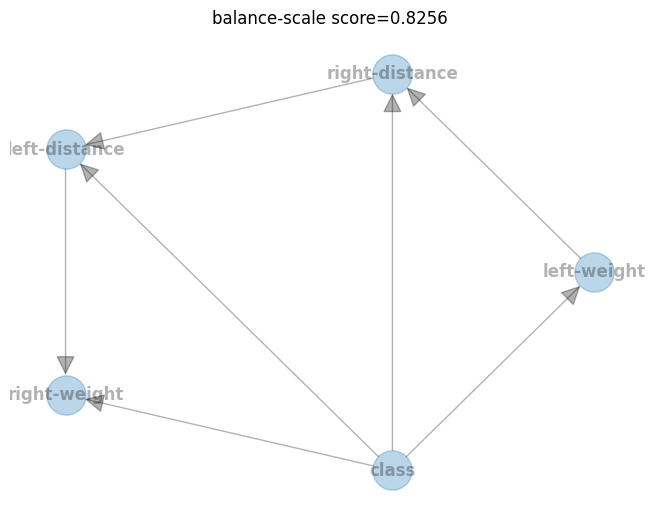

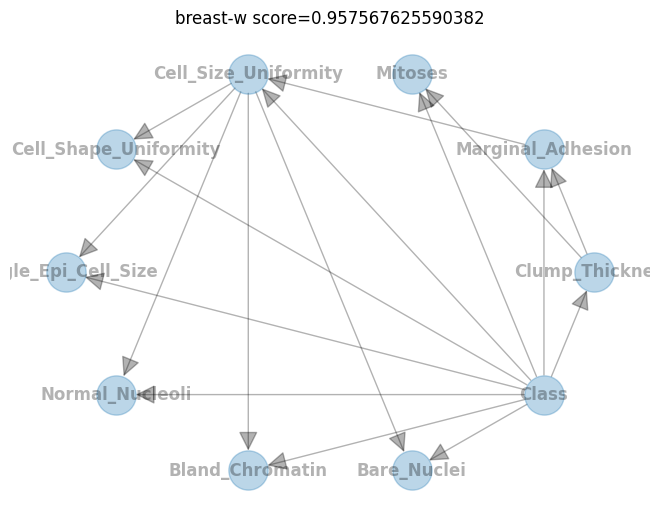

/Users/rmontanana/Code/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:541: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(


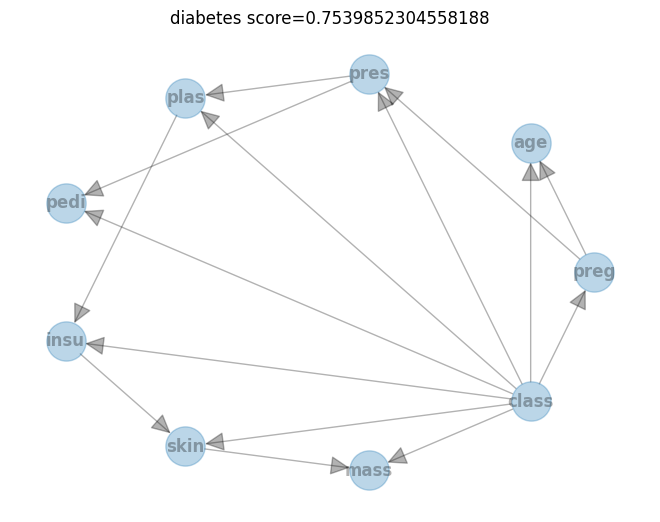

/Users/rmontanana/Code/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:541: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(
/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rmontanana/.virtualenvs/310/lib/p

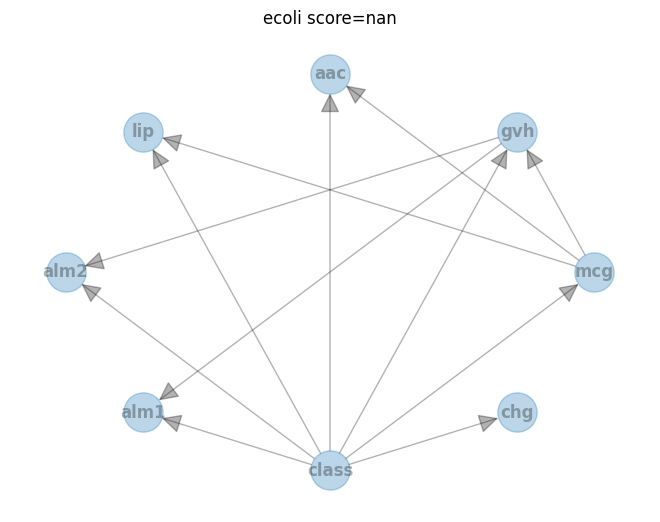

/Users/rmontanana/Code/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:541: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(
/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rmontanana/.virtualenvs/310/lib/p

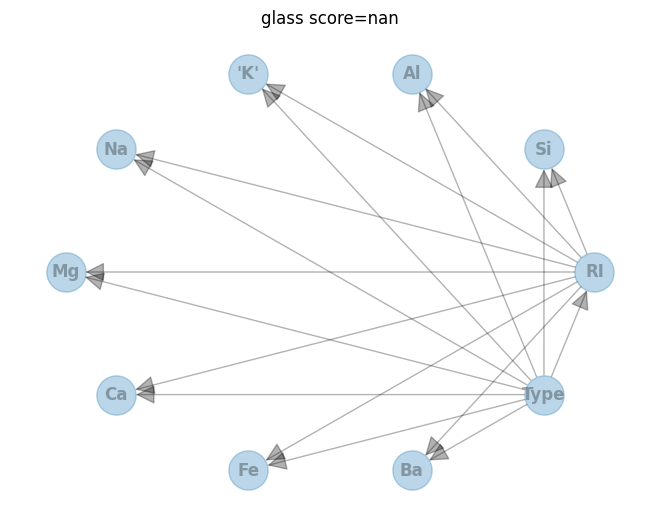

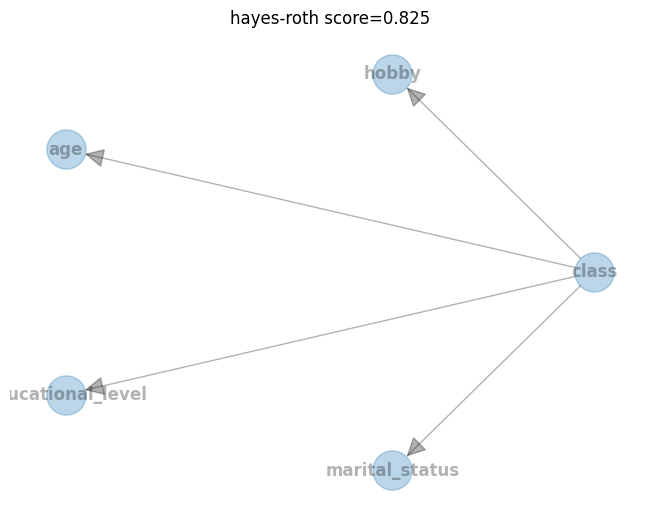

/Users/rmontanana/Code/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:541: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(


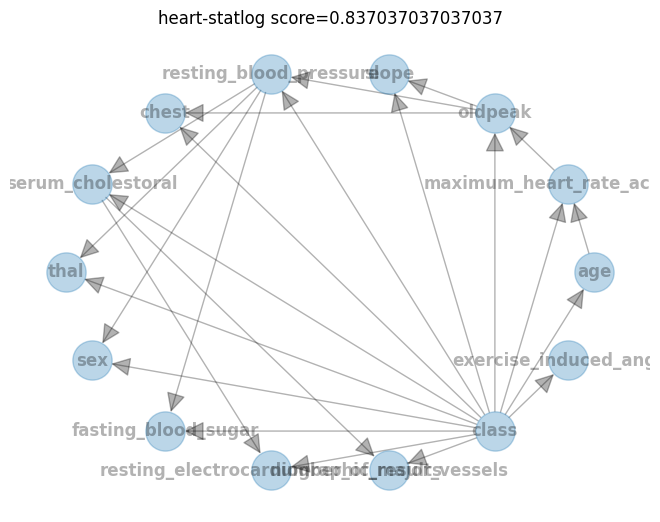

/Users/rmontanana/Code/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:541: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(
/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rmontanana/.virtualenvs/310/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rmontanana/.virtualenvs/310/lib/p

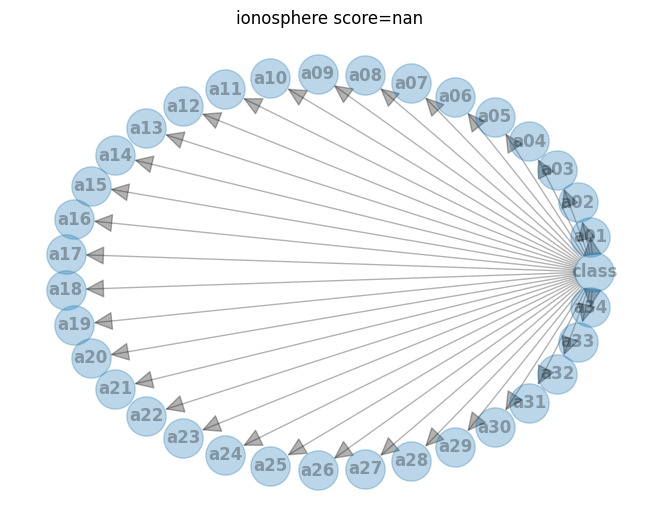

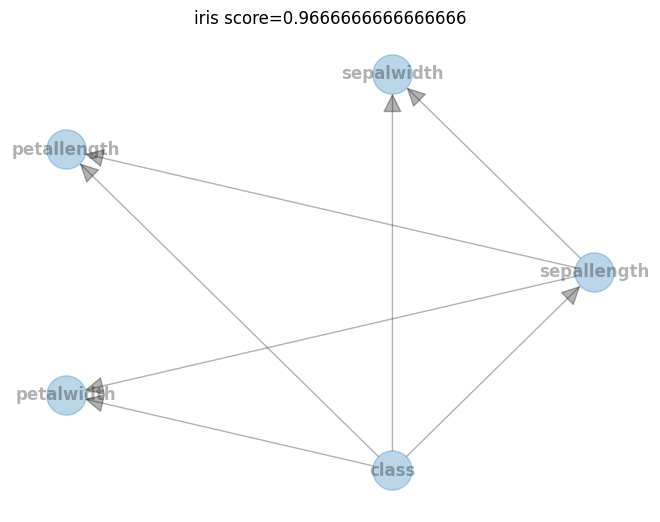

KeyboardInterrupt: 

In [4]:
splitter = False
dt = Discretizer()
for name in dt:
    splitter(dt, name) if splitter else crossval(dt, name)

In [ ]:
name = "balance-scale"
X, y = dt.load(name)
features, class_name = dt.get_features(), dt.get_class_name()
fit_params=dict(features=features, class_name=class_name, head=0)
score = validate_classifier(TAN(), X, y, fit_params=fit_params, stratified=False)

In [ ]:
print(score)

{'fit_time': array([0.06072092, 0.04777884, 0.08816218, 0.15080619, 1.62921786]), 'score_time': array([0.20613718, 0.20061731, 0.21159077, 0.20808077, 0.20848513]), 'estimator': [TAN(), TAN(), TAN(), TAN(), TAN()], 'test_score': array([0.856, 0.888, 0.848, 0.848, 0.824])}
